# **A Era dos Sistemas de Recomendação**

A rápida crescente do armazenamento de dados levou a uma nova era de informação. Os dados estão sendo usados para criar sistemas mais eficientes e é aí que entram os Sistemas de Recomendação. Os Sistemas de Recomendação são um tipo de **sistemas de filtragem de informações** pois eles melhoram a qualidade dos resultados de busca e fornecem itens que são mais relevantes para o item de busca ou estão relacionados ao histórico de busca do usuário.

Eles são usados para prever a **classificação** ou **preferência** que um usuário daria a um item. Quase todas as grandes empresas de tecnologia os aplicam de alguma forma ou de outra: a Amazon os usa para sugerir produtos aos clientes, o YouTube os usa para decidir qual vídeo reproduzir em seguida no autoplay e o Facebook os usa para recomendar páginas para curtir e pessoas para seguir.

Além disso, empresas como Netflix e Spotify dependem muito da eficácia de seus mecanismos de recomendação para seus negócios e sucesso.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

Nesse notebook, vamos construir um sistema de recomendação de filmes usando o [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). Para novatos como eu, esse notebook servirá como uma base em sistemas de recomendação e fornecerá algo para começar.

**Vamos começar!**

Existem basicamente três tipos de sistemas de recomendação:

> * **Filtragem Demográfica** - Eles oferecem recomendações generalizadas a cada usuário, com base na popularidade do filme e / ou gênero. O sistema recomenda os mesmos filmes para usuários com recursos demográficos semelhantes. Como cada usuário é diferente, essa abordagem é considerada muito simples. A ideia básica por trás desse sistema é que filmes mais populares e aclamados pela crítica terão uma probabilidade maior de serem apreciados pelo público em geral.


> * **Filtragem Baseada em Conteúdo** - Eles sugerem itens com base em um determinado item. Este sistema usa metadados de itens, como gênero, diretor, descrição, atores, etc. para fazer essas recomendações. A ideia geral por trás desses sistemas de recomendação é que, se uma pessoa gostou de um determinado item, ela também gostará de um item semelhante a ele.

> * **Filtragem Colaborativa** - Este sistema corresponde a pessoas com interesses semelhantes e fornece recomendações com base nessa correspondência. Os sistemas de filtragem colaborativa geralmente dependem de classificações de usuários anteriores e exigem dados suficientes sobre um usuário para compará-lo a outros usuários semelhantes. Eles são amplamente utilizados, pois não exigem nenhum conhecimento sobre itens que estão sendo recomendados. A filtragem colaborativa pode ser dividida em duas subcategorias:

Vamos carregar os dados e dar uma olhada nos atributos que temos.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
# Para manter montada a pasta do Google Drive no COLAB
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/Dados_Filmes/'
arquivo1 = 'tmdb_5000_credits.csv'
df1 = pd.read_csv(path1 + arquivo1)
df1.shape

(4803, 4)

In [ ]:
path2 = '/content/drive/MyDrive/Dados_Filmes/'
arquivo2 = 'tmdb_5000_movies.csv'
df2 = pd.read_csv(path2 + arquivo2)
df2.shape

(4803, 20)

In [ ]:
path1 = '/content/drive/MyDrive/Dados_Filmes/'
arquivo3 = 'movies_metadata.csv'
df3 = pd.read_csv(path1 + arquivo3, low_memory=False)
df3['id'] = pd.to_numeric(df3['id'], errors='coerce', downcast='integer')
df3['id'] = df3['id'].fillna(0).astype(int)
df3['id'].max()


469172

Temos aqui um dataframe contendo informações técnicas do elenco e da equipe de cada filme

In [ ]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Outro conjunto de dados retrata características de cada filme, como nome, id, língua, etc.

In [ ]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


O primeiro dataset tem os seguintes atributos:

* movie_id - Um identificador único para cada filme.
* cast - O nome dos atores principais e de apoio.
* crew - O nome do Diretor, Editor, Compositor, Escritor, etc.

O segundo dataset tem os seguintes atributos:

* budget - O orçamento em que o filme foi feito.
* genre - O gênero do filme, ação, comédia, suspense, etc.
* homepage - Um link para a página inicial do filme.
* id - Este é, na verdade, o movie_id como no primeiro conjunto de dados.
* keywords - As palavras-chave ou tags relacionadas ao filme.
* original_language - O idioma original em que o filme foi feito.
* original_title - O título do filme antes da tradução ou adaptação.
* overview - Uma breve descrição do filme.
* popularity - Uma quantidade numérica especificando a popularidade do filme.
* production_companies - A casa de produção do filme.
* production_countries - O país em que foi produzido.
* release_date - A data em que foi lançado.
* revenue - A receita mundial gerada pelo filme.
* runtime - O tempo de execução do filme em minutos.
* status - "Lançado" ou "Rumor".
* tagline - O slogan do filme.
* title - Título do filme.
* vote_average - classificações médias que o filme recebeu.
* vote_count - a contagem de votos recebidos.

Vamos juntar os dois conjuntos de dados na coluna 'id'

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Apenas uma olhada nos dados.

In [ ]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Filtragem Demográfica** -
Antes de começar com isso -
* precisamos de uma métrica para pontuar ou classificar filme
* Calcular a pontuação para cada filme
* Classifique as pontuações e recomende o filme com a melhor classificação para os usuários.

Podemos usar as classificações médias do filme como a pontuação, mas usar isso não seria justo o suficiente, já que um filme com uma classificação média de 8,9 e apenas 3 votos não pode ser considerado melhor do que o filme com 7,8 como como classificação média, mas 40 votos.
Então, vou usar a classificação ponderada do IMDB (wr) que é dada como: -

![](https://image.ibb.co/jYWZp9/wr.png)
onde,
* v é o número de votos para o filme;
* m é o número mínimo de votos necessários para ser listado no gráfico;
* R é a classificação média do filme; E
* C é a votação média em todo o relatório

Já temos v (**vote_count**) e R (**vote_average**) e C pode ser calculado como

In [ ]:
C= df2['vote_average'].mean()
C

6.092171559442016

Então, a classificação média para todos os filmes é de aproximadamente 6 em uma escala de 10. O próximo passo é determinar um valor apropriado para m, o número mínimo de votos necessários para ser listado no gráfico. Vamos usar o 90º percentil como nosso limite. Em outras palavras, para um filme estar presente nos gráficos, ele deve ter mais votos do que pelo menos 90% dos filmes da lista.

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Agora podemos filtrar os filmes que se qualificam para o gráfico.

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

Nós vemos que há 481 filmes que se qualificam para estar nesta lista. Agora, precisamos calcular nossa métrica para cada filme qualificado. Para fazer isso, definiremos uma função, **weighted_rating ()** e definiremos um novo recurso **score**, do qual calcularemos o valor aplicando essa função ao nosso DataFrame de filmes qualificados:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define um novo atributo 'score' e calcula seu valor com 'weighted_rating()'
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finalmente, iremos organizar nosso DataFrame baseando-se no atributo score e imprimir o titulo, a contagem de votos, a média de votos e a pontuação dos 10 melhores filmes.

In [ ]:
# Organizar os filmes baseado no placar calculado acima
q_movies = q_movies.sort_values('score', ascending=False)

# Mostrar os 10 melhores filmes
q_movies[['title', 'vote_count', 'vote_average', 'score']].sort_values(by="score", ascending=False).head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Oba! Construímos nosso primeiro (embora muito básico) recomendador.
Sob a guia **Trending Now** desses sistemas, encontramos filmes que são muito populares e podem ser obtidos apenas classificando o conjunto de dados pela coluna de popularidade.

Text(0.5, 1.0, 'Popular Movies')

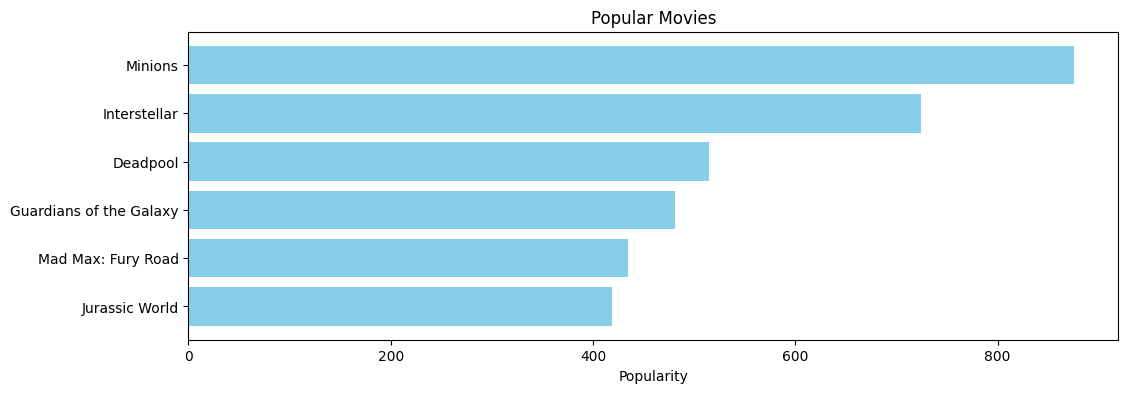

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Agora algo para manter em mente é que esses recomendadores demográficos fornecem um gráfico geral de filmes recomendados a todos os usuários. Eles não são sensíveis aos interesses e gostos de um usuário em particular.
É quando passamos para um sistema mais refinado - Filtragem Baseada em Conteúdo.

# **Filtragem Baseada em Conteúdo**
Nesse sistema de recomendação, o conteúdo do filme (visão geral, elenco, equipe, palavra-chave, tagline etc.) é usado para encontrar sua semelhança com outros filmes. Em vez de depender apenas de dados de comportamento de outros usuários, como na Filtragem Colaborativa, a Filtragem Baseada em Conteúdo analisa as características dos filmes e os perfis de preferência daquele usuário, para então realizar as recomendações personalizadas.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Sistema de Recomendação com Base na Descrição da Trama**

Nesse caso, as recomendações serão feitas a partir das características textuais das descrições dos filmes.

É um processo que requer:
- Obtenção dos dados característicos dos filmes
- Limpeza e pré-processamento das descrições, retirando pontuações, stop words e convertendo-as em uma representação numérica, como um vetor TF-IDF.
- Construção de um perfil de preferência para cada usuário
- Calcular a similaridade entre as descrições do filme
- Realizar a recomendação personalizada
- Avaliar o desempenho

A descrição do enredo é dada no recurso **overview** de nosso conjunto de dados.
Vamos dar uma olhada nos dados...

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Precisamos converter o vetor de palavras de cada descrição.
Agora iremos calcular vetores de Frequência de Termo-Inverso de Documento (TF-IDF) para cada descrição.

Agora, se você está se perguntando o que é frequência de termo, é a frequência relativa de uma palavra em um documento e é dada como
**(instâncias de termo / instâncias totais)**.
A Frequência Inversa de Documento é a contagem relativa de documentos que contêm o termo é dada como
**log (número de documentos / documentos com termo)**
A importância geral de cada palavra para os documentos em que aparecem é igual a **TF * IDF**

Isso lhe dará uma matriz em que cada coluna representa uma palavra no vocabulário da descrição (todas as palavras que aparecem em pelo menos um documento) e cada linha representa um filme.

Felizmente, o scikit-learn oferece uma classe TfIdfVectorizer integrada que produz a matriz TF-IDF em algumas linhas. Isso é ótimo, não é?

Vamos importar a classe TfidfVectorizer, usada para converter dados de texto em representação numérica.

Após isso criaremos o Tfidf, especificando que as stop words em inglês deverão ser removidas do processo.

Os valores nulos da descrição serão completados com " " para evitar problemas durante a vetorização.

A técnica TF-IDF será aplicada na coluna descrição, transformando o texto em uma matriz, onde cada linha representa um filme e cada coluna uma palavra do conjunto de dados. Cada valor na matriz é a pontuação TF-IDF para cada palavra naquele filme.

Finalmente analisaremos a dimensão da nossa matriz TF-IDF resultante, onde as linhas serão a quantidade de filmes e as colunas o total de palavras analisado.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

,00,000,007,07am,10,100,1000,101,108,10th,...,zuckerberg,zula,zuzu,zyklon,æon,éloigne,émigré,été,única,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Com essa matriz em mãos, agora podemos calcular uma pontuação de similaridade. Existem várias formas para fazer isso, como a pontuação de similaridade euclidiana, de Pearson e de [similaridade de cosseno](https://en.wikipedia.org/wiki/Cosine_similarity).

Não há resposta certa para qual pontuação é a melhor. Diferentes pontuações funcionam bem em cenários diferentes e muitas vezes é uma boa ideia experimentar diferentes métricas.

Usaremos a **similaridade de cosseno** para calcular uma quantidade numérica que denota a similaridade entre dois filmes, pois ela é independente da magnitude e é relativamente fácil e rápida de calcular. Matematicamente, é definido da seguinte forma:

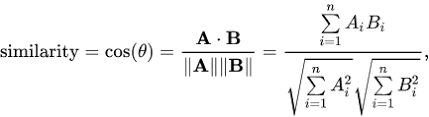

Vamos importar a função linear kernel, que será responsável por calcular os produtos internos entre os vetores, que serão nossas medidas de similaridade.

Após isso calcularemos a similaridade linear entre todos os pares de filmes da matriz tfidf.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Agora criaremos um mapa reverso, ou seja, os títulos dos filmes serão associados ao seus respectivos índices no df2, para que possamos encontrar o índice de um filme usando o seu título

In [ ]:
#Contruir um mapa reversos dos índices e títulos dos filmes
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

Nós iremos definir uma função que leva o título do filme como uma entrada e devolve os 10 filmes mais semelhantes a ele com base na pontuação de similaridade de cosseno.
Estes são os seguintes passos que seguiremos:
* Obter o índice do filme dado o seu título.
* Obter a lista de pontuações de similaridade de cosseno para esse filme em particular com todos os outros filmes, convertendo-os em uma lista de tuplas em que o primeiro elemento é a posição e o segundo é a pontuação de similaridade.
* Classificar a lista de tuplas com base nas pontuações de similaridade, ou seja, o segundo elemento.
* Obter os 10 principais elementos dessa lista, ignorando o primeiro elemento, pois se refere ao próprio filme.
* Retornar os 10 títulos correspondentes aos índices dos principais elementos.

In [ ]:
# Função que pega o título do filme como input e devolve os filmes mais similares
def get_recommendations(title, cosine_sim=cosine_sim):
    # Pega o índice do filme que bate com o título
    idx = indices[title]

    # Pega o score de similaridade em pares de todos os filmes com aquele filme
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Varia de 0 a 1: 0 nenhuma similaridade, 1 similaridade total
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Pega os 10 mais correlacionados
    sim_scores = sim_scores[1:11]

    # Coleta os índices dos filmes
    movie_indices = [i[0] for i in sim_scores]

    # Cria um DataFrame com as informações dos filmes mais similares
    recommendations_df = df2.iloc[movie_indices].reset_index(drop=True)

    # Retorna o DataFrame com os 10 filmes mais similares
    return recommendations_df[['id','title']]

In [ ]:
get_recommendations('The Dark Knight Rises')

,id,title
0,155,The Dark Knight
1,414,Batman Forever
2,364,Batman Returns
3,268,Batman
4,142061,"Batman: The Dark Knight Returns, Part 2"
5,272,Batman Begins
6,18777,Slow Burn
7,209112,Batman v Superman: Dawn of Justice
8,820,JFK
9,415,Batman & Robin


In [ ]:
get_recommendations('The Avengers')

,id,title
0,99861,Avengers: Age of Ultron
1,208869,Plastic
2,8831,Timecop
3,67373,This Thing of Ours
4,9388,Thank You for Smoking
5,9455,The Corruptor
6,33909,Wall Street: Money Never Sleeps
7,3989,Team America: World Police
8,1381,The Fountain
9,110415,Snowpiercer


Enquanto nosso modelo tem feito um trabalho decente de encontrar filmes com descrições de enredo semelhantes, a qualidade das recomendações não é tão boa.

"The Dark Knight Rises" retorna todos os filmes do Batman, enquanto é mais provável que as pessoas que gostaram desse filme estejam mais inclinadas a gostar de outros filmes de Christopher Nolan. Isso é algo que não pode ser capturado pelo sistema atual.

## **Sistema de Recomendação com Base em Créditos, Gêneros e Palavras-Chave**
Um sistema de recomendação com base em créditos, gêneros e palavras-chave é uma abordagem que utiliza informações específicas sobre filmes, como os envolvidos na produção (créditos), os gêneros aos quais pertencem e palavras-chave associadas a eles, para fazer recomendações personalizadas

É obvio que a qualidade do nosso recomendador melhoraria com o uso de metadados mais ricos. Isso é exatamente o que vamos fazer nesta seção. Vamos construir um recomendador com base nos seguintes metadados: os 3 principais atores, o diretor, os gêneros relacionados e as palavras-chave do enredo do filme.

Primeiramente vamos analisar os atributos elenco, equipe, palavras chave e gêneros

In [ ]:
df2[['cast', 'crew', 'keywords', 'genres']].head(1)

,cast,crew,keywords,genres
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


Agora vamos converter essas listas de dicionários em formator JSON em dicionários python

In [ ]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Em seguida, iremos escrever funções que nos ajudarão a extrair informações necessárias de cada recurso.

In [ ]:
df2['crew'], df2['crew'][0][0]

(0       [{'credit_id': '52fe48009251416c750aca23', 'de...
 1       [{'credit_id': '52fe4232c3a36847f800b579', 'de...
 2       [{'credit_id': '54805967c3a36829b5002c41', 'de...
 3       [{'credit_id': '52fe4781c3a36847f81398c3', 'de...
 4       [{'credit_id': '52fe479ac3a36847f813eaa3', 'de...
                               ...                        
 4798    [{'credit_id': '52fe44eec3a36847f80b280b', 'de...
 4799    [{'credit_id': '52fe487dc3a368484e0fb013', 'de...
 4800    [{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...
 4801    [{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...
 4802    [{'credit_id': '58ce021b9251415a390165d9', 'de...
 Name: crew, Length: 4803, dtype: object,
 {'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'})

Vamos retirar aqui o nome do diretor da lista 'crew'

In [ ]:
# Obter o nome do diretor do filme, Se não houver diretor, retorna NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

Ela extrai os nomes de dicionários e retorna uma lista contendo os três primeiros elementos

In [ ]:
# Retorna os 3 principais elementos da lista ou a lista inteira; o que quer que seja maior
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Checa se mais de 3 elementos existem. Se sim, retorna apenas os 3 primeiros. Se não, retorna a lista inteira.
        if len(names) > 3:
            names = names[:3]
        return names

    # Retorna uma lista vazia em caso de falta/má formatação de dados
    return []

In [ ]:
# Define novo diretor, elenco, gêneros e palavras-chave que estão em uma forma adequada.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Exibe os novos recursos dos primeiros 3 filmes
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


O próximo passo é converter os nomes e instâncias de palavras-chave em minúsculas e remover todos os espaços entre eles. Isso é feito para que nosso vetorizador não conte o Johnny de "Johnny Depp" e "Johnny Galecki" como o mesmo. Essa é uma abordagem bastante simples para lidar com a natureza idiossincrática dos dados e, embora não seja perfeita, servirá ao nosso propósito.

In [ ]:
# Função para converter todas as listas de strings em minúsculas e remover espaços
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Aplicar uma função que limpa os dados para os seus atributos
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Agora nós podemos criar nosso "metadata soup", que é uma string que contém todos os metadados que queremos alimentar para nosso vetorizador (nomeadamente atores, diretor e palavras-chave).

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

Os próximos passos são os mesmos que os que seguimos no nosso recomendador de descrição de parcela baseado em conteúdo, exceto que usaremos o **CountVectorizer ()** em vez do TF-IDF. Isso é porque você não quer baixar a presença de um ator / diretor se ele ou ela atuou ou dirigiu em relativamente mais filmes. Não faz muito sentido intuitivo.

In [ ]:
# Importar CountVectorizer e criar a matriz de contagem
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# Calcula a matriz de similaridade cosseno baseado na matriz de contagem
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reseta o índice do DataFrame principal e constrói um mapeamento inverso como antes
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Podemos agora reutilizar nossa função **get_recommendations ()** ao passar nosso novo **cosine_sim2** matriz como seu segundo argumento.

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

,id,title
0,155,The Dark Knight
1,272,Batman Begins
2,378237,Amidst the Devil's Wings
3,1124,The Prestige
4,2088,Romeo Is Bleeding
5,312113,Black November
6,22907,Takers
7,41283,Faster
8,314,Catwoman
9,82682,Gangster Squad


In [ ]:
get_recommendations('The Dark Knight Rises')

,id,title
0,155,The Dark Knight
1,414,Batman Forever
2,364,Batman Returns
3,268,Batman
4,142061,"Batman: The Dark Knight Returns, Part 2"
5,272,Batman Begins
6,18777,Slow Burn
7,209112,Batman v Superman: Dawn of Justice
8,820,JFK
9,415,Batman & Robin


In [ ]:
get_recommendations('The Godfather', cosine_sim2)

,id,title
0,242,The Godfather: Part III
1,240,The Godfather: Part II
2,378237,Amidst the Devil's Wings
3,74536,The Son of No One
4,28,Apocalypse Now
5,2148,The Cotton Club
6,1213,The Talented Mr. Ripley
7,11975,The Rainmaker
8,9366,Donnie Brasco
9,111,Scarface


In [ ]:
get_recommendations('The Avengers', cosine_sim2)

,id,title
0,99861,Avengers: Age of Ultron
1,271110,Captain America: Civil War
2,10138,Iron Man 2
3,1771,Captain America: The First Avenger
4,1724,The Incredible Hulk
5,100402,Captain America: The Winter Soldier
6,68721,Iron Man 3
7,36668,X-Men: The Last Stand
8,1726,Iron Man
9,118340,Guardians of the Galaxy


Nós vemos que o nosso recomendador teve sucesso em capturar mais informação devido a mais metadados e nos deu (arguably) melhores recomendações. É mais provável que os fãs de quadrinhos da Marvel ou DC gostem dos filmes da mesma casa de produção. Portanto, para nossos recursos acima, podemos adicionar *production_company*.
Também podemos aumentar o peso do diretor, adicionando o recurso várias vezes na sopa.

# **Filtragem Colaborativa**

Nosso mecanismo baseado em conteúdo sofre de algumas limitações graves. Ele só é capaz de sugerir filmes que estão próximos a um determinado filme. Ou seja, não é capaz de capturar gostos e fornecer recomendações em todos os gêneros.

Além disso, o mecanismo que construímos não é realmente pessoal no sentido de que não captura os gostos e preconceitos pessoais de um usuário. Qualquer pessoa que consulte nosso mecanismo para recomendações com base em um filme receberá as mesmas recomendações para esse filme, independentemente de quem ela / ele seja.

Portanto, nesta seção, usaremos uma técnica chamada Filtragem Colaborativa para fazer recomendações aos espectadores de filmes.

Basicamente, existem dois tipos: -

* **Filtragem baseada em usuário** - Esses sistemas recomendam produtos a um usuário que usuários semelhantes gostaram. Para medir a similaridade entre dois usuários, podemos usar a correlação de Pearson ou a similaridade de cosseno.

Este filtro pode ser ilustrado com um exemplo. Nas seguintes matrizes, cada linha representa um usuário, enquanto as colunas correspondem a diferentes filmes, exceto a última, que registra a similaridade entre esse usuário e o usuário de destino. Cada célula representa a classificação que o usuário dá a esse filme. Suponha que o usuário E seja o alvo.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Desde que o usuário A e F não compartilhem nenhuma classificação de filme em comum com o usuário E, suas similaridades com o usuário E não são definidas em Correlação de Pearson. Portanto, só precisamos considerar o usuário B, C e D. Com base na Correlação de Pearson, podemos calcular a seguinte similaridade.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

Da tabela acima podemos ver que o usuário D é bem diferente do usuário E como a Correlação de Pearson entre eles é negativa. Ele classificou Me Before You mais alto do que sua classificação média, enquanto o usuário E fez o oposto. Agora, podemos começar a preencher o espaço em branco para os filmes que o usuário E não classificou com base em outros usuários.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Embora calcular o CF baseado em usuário seja muito simples, ele sofre de vários problemas. Um problema principal é que a preferência dos usuários pode mudar ao longo do tempo. Isso indica que pré-computar a matriz com base em seus usuários vizinhos pode levar a um mau desempenho. Para resolver esse problema, podemos aplicar o CF baseado em itens.

* **Filtragem baseada em itens** - Em vez de medir a similaridade entre os usuários, o CF baseado em itens recomenda itens com base em sua similaridade com os itens que o usuário de destino classificou. Da mesma forma, a similaridade pode ser calculada com a Correlação de Pearson ou a Similaridade de Cosseno. A diferença principal é que, com o CF baseado em itens, preenchemos o espaço em branco verticalmente, ao contrário da maneira horizontal que o CF baseado em usuário faz. A tabela a seguir mostra como fazer isso para o filme Me Before You.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

Isso evita com sucesso o problema apresentado pela preferência dinâmica do usuário, já que a CF baseada em itens é mais estática. Entretanto, vários problemas permanecem para este método. Primeiro, o problema principal é a **escalabilidade**. O cálculo cresce tanto com o cliente quanto com o produto. A complexidade do pior caso é O (mn) com m usuários e n itens. Além disso, a **escassez** é outra preocupação. Dê uma olhada na tabela acima novamente. Embora haja apenas um usuário que classificou tanto Matrix quanto Titanic, a similaridade entre eles é 1. Em casos extremos, podemos ter milhões de usuários e a similaridade entre dois filmes bastante diferentes pode ser muito alta simplesmente porque eles têm classificação semelhante para o único usuário que os classificou.



### **Decomposição em Valores Singulares (SVD)**
Uma maneira de lidar com o problema de escalabilidade e esparsidade criado pela Filtragem Colaborativa (CF) é aproveitar um modelo de fator latente para capturar a similaridade entre usuários e itens. Essencialmente, queremos transformar o problema de recomendação em um problema de otimização. Podemos vê-lo como quão bom somos em prever a classificação para itens dados a um usuário. Uma métrica comum é o Erro Quadrático Médio (RMSE). Quanto menor o RMSE, melhor o desempenho.

Agora, falando sobre fator latente, você pode estar se perguntando o que é isso? É uma ideia ampla que descreve uma propriedade ou conceito que um usuário ou item possui. Por exemplo, para música, o fator latente pode se referir ao gênero ao qual a música pertence. A SVD diminui a dimensão da matriz de utilidade extraindo seus fatores latentes. Essencialmente, mapeamos cada usuário e cada item em um espaço latente com dimensão
�
r. Portanto, isso nos ajuda a entender melhor a relação entre usuários e itens, tornando-os diretamente comparáveis. A figura abaixo ilustra essa ideia.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Agora foi dito o suficiente, vamos ver como implementar isso.
Como o conjunto de dados que usamos não tinha userId (que é necessário para filtragem colaborativa), vamos carregar outro conjunto de dados. Usaremos a biblioteca [**Surprise**](https://surprise.readthedocs.io/en/stable/index.html) para implementar SVD.

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163745 sha256=60a957daa68bdadb3ca09d2b6d29a8af920193e8b30a7db1db9939bcb38b468e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


- Reader:  analisar um conjunto de dados e definir as informações necessárias para criar um objeto Dataset.

- Dataset: é uma estrutura de dados específica para sistemas de recomendação.Ela é projetada para carregar e manipular conjuntos de dados que consistem em avaliações ou classificações de usuários para itens

- SVD descompõe uma matriz em três outras matrizes, reduzindo a dimensionalidade da matriz das avaliações dos usuários para os itens.



In [ ]:
from surprise import Reader, Dataset, SVD#, evaluate
from surprise.model_selection import cross_validate
reader = Reader()

In [ ]:
path3 = '/content/drive/MyDrive/Dados_Filmes/'
arquivo3 = 'ratings_small.csv'
ratings = pd.read_csv(path3 + arquivo3)

Note que nesse dataset, os filmes são classificados em uma escala de 5 ao contrário do anterior.

- Carregando os dados com Dataset, já no formato correto
- Validação cruzada com SVD: validação cruzada usando 5 folds para avaliar o desempenho de um modelo de recomendação baseado em SVD

In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
results = cross_validate(SVD(), data, measures=['RMSE'], cv=5, verbose=True)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8964  0.8945  0.8942  0.9037  0.8952  0.8968  0.0035  
Fit time          1.66    1.79    3.28    5.95    4.42    3.42    1.63    
Test time         0.12    0.24    0.57    0.60    0.33    0.37    0.19    


Nós obtemos uma matriz de RMSE de 0,89 que é mais do que bom o suficiente para nossos propósitos. Agora vamos usar o algoritmo SVD para treinar nosso conjunto de dados e chegar a previsões.

In [ ]:
# Exiba os resultados
for key, values in results.items():
    if key == 'test_rmse':
        print(f"{key}: {sum(values) / len(values)}")
    else:
        print(f"{key}: {values}")


test_rmse: 0.8968225018011129
fit_time: (1.655815839767456, 1.785836935043335, 3.278268814086914, 5.949956893920898, 4.420374393463135)
test_time: (0.12280488014221191, 0.23921871185302734, 0.5654628276824951, 0.6014280319213867, 0.3309471607208252)


Vamos pegar o usuário com o Id 1 e verificar os filmes que ela / ele classificou.

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
ratings['movieId'].max()

163949

In [ ]:
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

In [ ]:
# import pickle

# with open('modelo.pkl', 'wb') as arquivo:
#     pickle.dump(model, arquivo)
# with open('df3.pkl', 'wb') as arquivo:
#     pickle.dump(df3, arquivo)
# with open('data.pkl', 'wb') as arquivo:
#     pickle.dump(data, arquivo)
# with open('trainset.pkl', 'wb') as arquivo:
#     pickle.dump(trainset, arquivo)
# from google.colab import files

# files.download('trainset.pkl')

In [ ]:
user_id = 1
item_id = 318
predicted_rating = model.predict(user_id, item_id, r_ui=3)  # r_ui é a classificação real, se disponível
predicted_rating

Prediction(uid=1, iid=318, r_ui=3, est=3.6109937652118553, details={'was_impossible': False})

In [ ]:
print(f"A previsão de rating para o usuário {user_id} no item {item_id} é: {predicted_rating.est}")


A previsão de rating para o usuário 1 no item 318 é: 3.6109937652118553


In [ ]:
def previsao(n):
  all_predictions = []
  user_id = n
  for movie_id in range(1, 469172):  # Assumindo que os IDs de filme variam de 1 a 163949
      # Fazer previsão para o filme atual
      predicted_rating = model.predict(user_id, movie_id, r_ui=3)  # r_ui é a classificação real, se disponível

      # Armazenar o ID do filme e a previsão na lista
      all_predictions.append({'movie_id': movie_id, 'predicted_rating': predicted_rating.est})

  # Criar DataFrame com as previsões
  df_results = pd.DataFrame(all_predictions)

  # Classificar as previsões com base nas notas em ordem decrescente
  df_results = df_results.sort_values(by='predicted_rating', ascending=False).head(10)

  # Converter a coluna 'movie_id' para o mesmo tipo de dados que a coluna 'id' em df3
  df_results['movie_id'] = df_results['movie_id'].astype(df3['id'].dtype)

  # Mesclar com o DataFrame df3 para obter as informações adicionais
  df_results = pd.merge(df_results, df3[['id', 'title']], left_on='movie_id', right_on='id', how='left')

  # Remover duplicatas
  df_results = df_results.drop_duplicates(subset=['movie_id', 'predicted_rating', 'title'])

  # Exibir o DataFrame resultante
  df_results = df_results[['movie_id', 'predicted_rating', 'title']].dropna()
  return df_results


In [ ]:
df3.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
previsao(100)

,movie_id,predicted_rating,title
0,318,4.424212,The Million Dollar Hotel
5,926,4.344794,Galaxy Quest


Assim podemos criar uma lista de recomendação para determinado usuário, indicando apenas os filmes que ele daria nota alta, ou seja, gostaria de assistir.

Para o filme com ID 302, nós obtemos uma previsão de **2,618**. Uma característica surpreendente deste sistema de recomendação é que ele não se importa com o que o filme é (ou o que ele contém). Ele funciona puramente com base em um ID de filme atribuído e tenta prever as classificações com base em como os outros usuários previram o filme.

## **Conclusão**
Nós criamos recomendadores usando demográficos, conteúdo e filtragem colaborativa. Enquanto a filtragem demográfica é muito elementar e não pode ser usada na prática, os sistemas híbridos podem tirar proveito da filtragem baseada em conteúdo e colaborativa, pois as duas abordagens são quase complementares.
Este modelo foi muito básico e fornece apenas uma estrutura fundamental para começar.

Gostaria de mencionar algumas referências excelentes que aprendi

1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

In [ ]:
!pip install dash dash_bootstrap_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 22.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html, Dash, dash_table
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
import plotly.express as px

In [ ]:
def graf_previsoes1(n):
  data = previsao(n)

  fig1 = px.bar(data,
                  x="title",
                  y="predicted_rating",
                  color="predicted_rating",
                  # orientation='h',  # Configuração para barras horizontais
                  color_continuous_scale=px.colors.diverging.RdYlGn,
                  text_auto=True).update_layout(bargap=0.2, bargroupgap=0.1)  # Ajuste os valores conforme necessário

  fig1.update_layout(title='Recomendação de Filmes',
                      xaxis_title='Filme',
                      yaxis_title='Nota',
                      plot_bgcolor='white',
                      paper_bgcolor='white',
                      font_color='black')

  fig1.update_xaxes(gridwidth=0.5, gridcolor='#D9D9D9')  # Agora é o eixo x
  fig1.update_yaxes(showgrid=True, categoryorder="total ascending", tickfont=dict(size=10),range=[0, 5])  # Agora é o eixo y
  fig1.update_traces(showlegend=False)
  fig1.update_coloraxes(showscale=False)
  fig1
  return fig1

In [ ]:
df2['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [ ]:
app = Dash(__name__, external_stylesheets = [dbc.themes.COSMO])
server = app.server
app.layout = dbc.Container([



    html.Div(
        [
            html.H1("Dashboard - Recomendação de Emprego", style={'color': 'white'}),  # Título do cabeçalho
            html.P("Recomendação de vaga para um candidato", style={'color': 'white'}),  # Texto descritivo
        ],
        style={'background-color': 'black', 'padding': '20px'}  # Estilo do cabeçalho
    ),

    dbc.Row([

      html.H2("Análise dos Dados", style={'color': 'black', 'textAlign': 'center'}),


        dbc.Col([
            html.H3(children="Recomendação Colaborativa",style={'textAlign': 'center'}),
            dcc.Input(
                id="botao-usuario1",
        placeholder='Escolha um usuário...',
        type='number',
        value=''
    )
,

            dcc.Graph(id="grafico1",
                    figure = graf_previsoes1(1))




    ]),



    ], style={
            'box-shadow': '5px 5px 5px 0px rgba(0, 0, 0, 0.5)',  # Propriedades da sombra
            'padding': '20px',  # Preenchimento interno
            'margin': '20px',  # Margem externa
            'border-radius': '10px',  # Raio das bordas
        }),

    dbc.Row([

      #html.H2("Análise dos Dados", style={'color': 'black', 'textAlign': 'center'}),
      dcc.Dropdown(

                         id = 'botao-usuario2',
            options = [{'label': i, 'value': i} for i in df2['title'].values],
            value = "Avatar"),


        dbc.Col([
            html.H3(children="Recomendação por Conteúdo - Descrição",style={'textAlign': 'center'}),
            dash_table.DataTable(id='tabela1', data=get_recommendations('Avatar').to_dict('records'),columns= [{"name": i, "id": i} for i in get_recommendations('Avatar').columns])
]),

         dbc.Col([
            html.H3(children="Recomendação por Conteúdo - Genero, Atores, Diretor",style={'textAlign': 'center'}),
            dash_table.DataTable(id='tabela2', data=get_recommendations('Avatar', cosine_sim2).to_dict('records'),columns= [{"name": i, "id": i} for i in get_recommendations('Avatar', cosine_sim2).columns])
]),



    ], style={
            'box-shadow': '5px 5px 5px 0px rgba(0, 0, 0, 0.5)',  # Propriedades da sombra
            'padding': '20px',  # Preenchimento interno
            'margin': '20px',  # Margem externa
            'border-radius': '10px',  # Raio das bordas
        })


], fluid=True)

@app.callback(
    Output('grafico1', 'figure'),
    [Input('botao-usuario1', 'value')]
)

def mudar_graf1(valor):
  return graf_previsoes1(valor)

@app.callback(
    [Output('tabela1', 'data'),
     Output('tabela2', 'data')],
    [Input('botao-usuario2', 'value')]
)
def update_tables(selected_movie):
    # Obter recomendações usando a função definida
    recommendations1 = get_recommendations(selected_movie)
    recommendations2 = get_recommendations(selected_movie, cosine_sim2)

    # Transformar os DataFrames em formato adequado para dash_table.DataTable
    data1 = recommendations1.to_dict('records')
    data2 = recommendations2.to_dict('records')

    return data1, data2

if __name__ == "__main__":
  app.run_server()
  #app.run(jupyter_mode="external")

<IPython.core.display.Javascript object>